# Projet Python pour la data science 2024 - 2025
*HADDOUCHE Théo, GOURVENNEC Jules, MATHÉ Cyprien, BROCHET Lison*

# Introduction
Depuis les Jeux Olympiques de Paris 2024, un certain nombre de jeunes se sont pris de passion pour le tennis de table et la natation. Cependant, cet engouement s’est heurté au manque d’infrastructure, à leur vétusté et au manque d’encadrant. Cela a de nouveau mis en lumière ce que nous avons appelé les « déserts sportifs ». A l’instar des « déserts médicaux », les « déserts sportifs » sont des zones géographiques souvent rurales, où les infrastructures sportives et les encadrants manquent et où infrastructures existantes sont pour la plupart vétustes et mal équipées. Cela qui constitue un obstacle à la pratique sportive des habitants de ces zones.

Pourtant, il semble exister un consensus sur les bienfaits d’une pratique sportive régulière, en cela qu’elle permet de prévenir un grand nombre de maladies notamment cardiovasculaires ; mais aussi en tant que facteur d’intégration sociale. Aussi, nous avons souhaité questionner cette notion de « désert sportif » sur la base du recensement des équipements sportifs en France. Pour cela, il nous a semblé pertinent d’analyser plusieurs variables telles que la vétusté des infrastructures étudiées, l’offre de sport selon les territoires, l’accessibilité aux infrastructures via des transports en commun.

Notre projet a donc pour objectif de répondre à la problématique suivante : A quel point la situation géographique d’un individu est-elle déterminante dans sa capacité à poursuivre une activité sportive régulière ?


# I/ Récupération et traitement des données

## A. Récupération des données : prise en main de l'API

Les données de la base de données Data ES que nous allons utiliser sont accessibles par une API qui nous permet de n'accéder qu'à quelques valeurs choisies en évitant de tout télécharger chaque fois. Deux modes d'accès sont permis, l'un limite à 100 éléments livrant directement un dataframe, un autre sans limite donne le lien de téléchargement d'un .csv. Le lien se construit dans l'interface du site avec une syntaxe proche du SQL accessible ici : https://equipements.sports.gouv.fr/explore/dataset/data-es/api/?q.

Les fonctions qui permettent d'obtenir les dataframes par ces deux méthodes sont importées et visibles depuis fonctions.py.

In [21]:
import pandas as pd
from fonctions import *

#Un exemple de lien pour obtenir le nombre d'infrastructures par département à l'aide de la méthode group_by et renommé sous la varibale nb_infra
api_url = "https://equipements.sports.gouv.fr/api/explore/v2.1/catalog/datasets/data-es/records?select=COUNT(inst_numero)%20as%20nb_infra&group_by=dep_nom&order_by=dep_code&limit=-1"
tab = call_api(api_url)
tab.head(3)

dict_keys(['results'])


,dep_nom,nb_infra
0,None,3
1,Ain,4118
2,Aisne,3691


## B. Nettoyage des données

Pour ce qui est du nettoyage, nous avons remarqué que de nombreux doublons apparaissaient initialement dans la base de données utilisée. Cela s'explique par le fait que plusieurs activités sportives sont proposées au sein d'un même endroit. Par exemple, il est fréquent d'avoir deux lignes pour une piscine comptant deux bassins. Pour remédier à ce problème, nous n'avons gardé qu'une ligne pour chaque lieu puis nous avons créé une nouvelle variable nous permettant de compter le nombre de lignes qu'il y avait avant. 
Autrement, les données étaient plutôt propres toutefois, nous pouvons noter un nombre important de cases n'ayant pas été renseignées.  

Les données sont à disposition sur le site data.gouv, ainsi elles sont dotées d'une licence ouverte. Le jeu contient environ 330 000 lignes, qui correspondent à des infrastructures sportives recensées sur le territoire national par le ministère chargé des sports, et il est mis à disposition de tous afin "d’aider à une meilleure perception des inégali­tés ter­ri­to­ria­les dans leur répar­ti­tion", ce à quoi nous allons essayer de contribuer.
D'abord, nous chargeons le jeu de données à partir de l'url, qui fournit un fichier csv. Des 117 variables, nous n'en gardons que 30, qui seront utilisables pour nos analyses futures.
Parmi les variables que nous avons sélectionné : ...

Nous allons donc procéder au traitement sur le jeu réduit de paramètres (31/117 disponibles):

inst_numero, inst_nom, dep_nom, dep_code_filled, new_code, new_name, inst_etat, 
inst_date_creation, inst_date_etat, inst_date_valid, inst_acc_handi_bool, 
inst_trans_bool, equip_numero, equip_nom, equip_type_code, 
equip_type_name, equip_type_famille, equip_x, equip_y, 
equip_etat, equip_eclair, equip_douche, equip_sanit, 
equip_pmr_aire, equip_pmr_douche, equip_pmr_sanit, 
equip_travaux_date, equip_service_date, equip_travaux_type, 
equip_energie, equip_prop_type, dens_lib, zrr_simp


In [24]:
#Cette cellule prend environ 1m30 à être exécutée
url = "https://equipements.sports.gouv.fr/api/explore/v2.1/catalog/datasets/data-es/records?select=inst_numero%2C%20inst_nom%2C%20dep_nom%2C%20dep_code_filled%2C%20new_code%2C%20new_name%2C%20inst_etat%2C%20%20inst_date_creation%2C%20inst_date_etat%2C%20inst_date_valid%2C%20inst_acc_handi_bool%2C%20%20inst_trans_bool%2C%20equip_numero%2C%20equip_nom%2C%20equip_type_code%2C%20%20equip_type_name%2C%20equip_type_famille%2C%20equip_x%2C%20equip_y%2C%20%20equip_etat%2C%20equip_eclair%2C%20equip_douche%2C%20equip_sanit%2C%20%20equip_pmr_aire%2C%20equip_pmr_douche%2C%20equip_pmr_sanit%2C%20%20equip_travaux_date%2C%20equip_service_date%2C%20equip_travaux_type%2C%20%20equip_energie%2C%20equip_prop_type%2C%20dens_lib%2C%20zrr_simp&limit=-1"

recensement = call_csv(url)
recensement.head(3)

c:\Users\cypri\Downloads\fonctions.py:30: DtypeWarning: Columns (3,4,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('equipements_ile_de_france.csv', delimiter=';')


,inst_numero,inst_nom,dep_nom,dep_code_filled,new_code,new_name,inst_etat,inst_date_creation,inst_date_etat,inst_date_valid,...,equip_pmr_aire,equip_pmr_douche,equip_pmr_sanit,equip_travaux_date,equip_service_date,equip_travaux_type,equip_energie,equip_prop_type,dens_lib,zrr_simp
0,I132080057,LYCEE MISTRAL,Bouches-du-Rhône,13,13208,Marseille 8e Arrondissement,Validé,2005-08-28,2024-04-23,2024-04-23,...,False,NaN,False,NaN,1965.0,NaN,NaN,Région,Grands centres urbains,NaN
1,I132080057,LYCEE MISTRAL,Bouches-du-Rhône,13,13208,Marseille 8e Arrondissement,Validé,2005-08-28,2024-04-23,2024-04-23,...,False,NaN,False,NaN,NaN,NaN,NaN,Région,Grands centres urbains,NaN
2,I132080058,COMPLEXE SPORTIF JEAN BOUIN,Bouches-du-Rhône,13,13208,Marseille 8e Arrondissement,Validé,2005-08-28,2024-02-22,2024-02-22,...,False,NaN,False,2006.0,1960.0,"[""Vétusté normale""]","[""Gaz""]",Commune,Grands centres urbains,NaN


Il existe dans le jeu de données des sites comptées plusieurs fois pour leurs différentes infrastructures (plusieurs bâtiments ou piscines par exemple). Nous souhaitons supprimer ces doublons. Nous pourrions les supprimer par nom de site redondant, mais pour éviter les possibles de conflits de nom sur toute la France, nous préférons ajouter le code de commune à la distinction. Le couple (nom d'infrastructure, code de commune) devrait agir comme clef primaire.

In [36]:
# Création d'une liste qui compte le nombre de doublons par couple (nom d'infrastructure, code de commune) censé représenter une infrastructure unique
doublons = (recensement
            .groupby(['inst_nom', 'new_code'])
            .size()
            .reset_index(name='n')
            .query('n > 0'))

#Suppression des précédents doublons en les remplaçant tous par la première occurence du couple dans le dataset
distinct = recensement.drop_duplicates(subset=['inst_nom', 'new_code'], keep='first')
print("Doublons supprimés : ", len(recensement)-len(distinct))
print("Fréquence de lignes supprimées :", (len(recensement)-len(distinct))/len(recensement))

#Ajout du nombre d'occurence correspondant à chaque couple (nombre de doublons supprimés par infrastructure dans la liste)
df_es = pd.merge(distinct, doublons, on=['inst_nom', 'new_code'], how='outer')

Doublons supprimés :  164548
Fréquence de lignes supprimées : 0.4945064191950762


Près de 50% des lignes du datasets ont été supprimées, le nettoyage était donc bien nécessaire.

## B. Création de nouvelles variables 

# II/ Analyse descriptive et représentation graphique

## A. Description de la base de données utilisée

## B. Grandes tendances observées

Pour représenter nos données sur une carte et donner des tendances par territoire, nous commençons par mettre en place le module cartiflette qui va nous permettre d'obtenir des données géographiques pour tracer des valeurs par département. Le code suivant s'emploie à créer un dataframe adapté à cartiflette à partir de notre dataset.

Text(0.5, 1.0, "Nombre d'équipements sportifs par département")

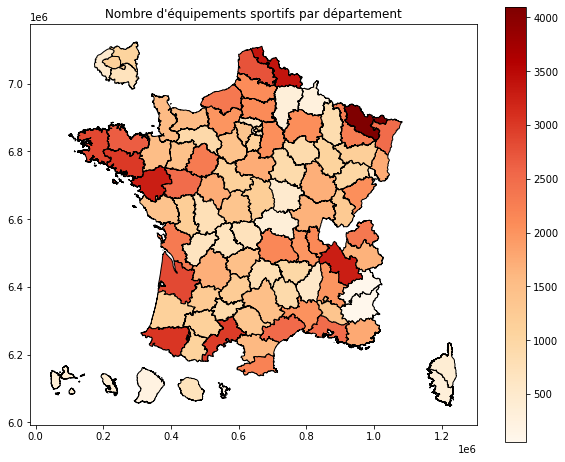

In [ ]:
import geopandas as gpd
from cartiflette import carti_download

departements = carti_download(
    values="France",
    crs=4326,
    borders="DEPARTEMENT",
    vectorfile_format="geojson",
    filter_by="FRANCE_ENTIERE_DROM_RAPPROCHES",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)

#Passage en espg 2154 : Lambert 93 pour avoir des surfaces en m²
departements = departements.to_crs(epsg=2154)

# Ajout de l'aire en km²
departements['AREA'] = departements.area.div(1e6)

#Pour accorder les deux colonnes sur lesquelles merge les bases de donnée, la synthèse se fait sur 'dep_code_filled'
# Le filled est très important pour une question de correspondance de syntaxe

#On compte le nombre de numéro de sites différents par code de département
counts = df_es.groupby('dep_code_filled')['inst_numero'].count().reset_index(name='count')

#On passe le code de département en string pour cartiflette
counts['dep_code_filled'] = counts['dep_code_filled'].astype(str)


#Correction des polygones cartiflette pour n'avoir qu'un polygone par département
departements = departements.dissolve(by='INSEE_DEP')
departements = departements.reset_index()
departements['INSEE_DEP'] = departements['INSEE_DEP'].astype(str)

#Fusion des données cartiflette et de notre base de données par le numéro des départements maintenant homogénéisé
departements = departements.merge(counts, left_on="INSEE_DEP", right_on="dep_code_filled", how="left")


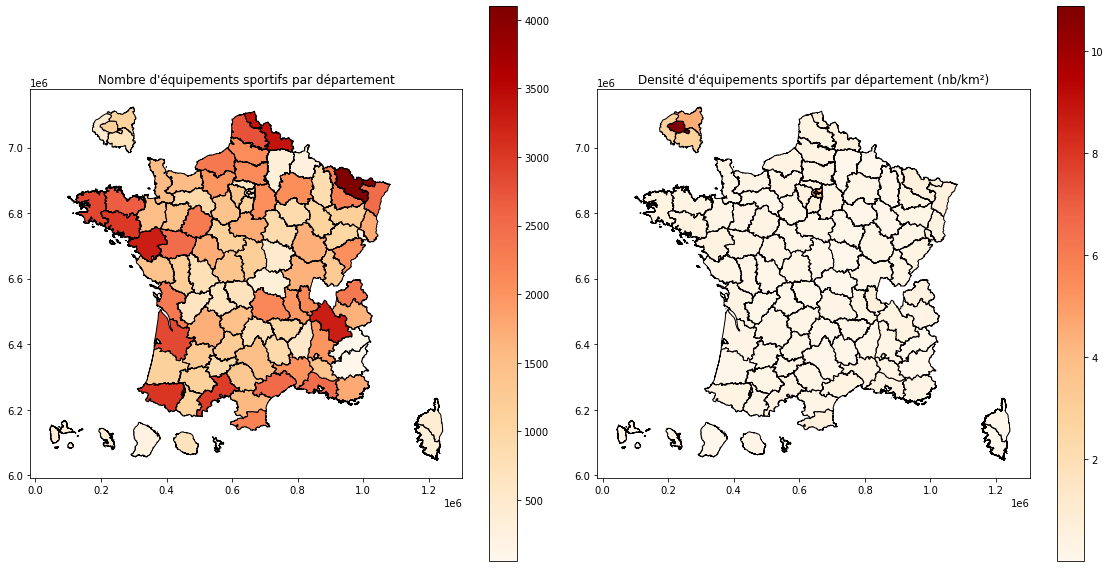

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Tracer une première carte de nb d'infra par dep
departements.plot(
    column='count',            # La colonne utilisée pour colorier la carte
    cmap='OrRd',                  # Palette de couleurs (Orange-Red)
    legend=True,                  # Afficher une légende
    ax=axes[0],              # Taille de la carte
    edgecolor='black'             # Couleur des bordures
)

axes[0].set_title('Nombre d\'équipements sportifs par département')

# Tracer une seconde carte pour obtenir un indicateur secondaire calculé à partir des autres données (ici nb d'infra par km²)
departements['param_interet'] = departements['count']/departements['AREA']

departements.plot(
    column='param_interet',            # La colonne utilisée pour colorier la carte
    cmap='OrRd',                  # Palette de couleurs (Orange-Red)
    legend=True,                  # Afficher une légende
    ax=axes[1],              # Taille de la carte
    edgecolor='black'             # Couleur des bordures
)

axes[1].set_title("Densité d'équipements sportifs par département (nb/km²)")

plt.tight_layout()


# III/ Modélisation